<a href="https://colab.research.google.com/github/Supriyo-ux/DataScience-Analytics-R-Python/blob/master/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proposed Plan:

In this project I will use the above data parameters to predict the outcome of the marketing campaign for the customer.

I will be using Matplotlib and Seaborn for basic visualization and exploratory data analysis. I will also be making use of pandas packages to wrangle the data. Some data wrangling techniques that we will be using are imputation of missing/ NA data values, and converting categorical variables to numeric variables using one hot encoding.



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [3]:
# Getting the predicted values in terms of 0 and 1
Y = (df['y'] == 'yes')*1

In [4]:
# Looking at statistics of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Dropping y from the original dataset as we have read it seperately
df.drop('y', axis = 1, inplace = True)

In [6]:
# First five rows of the dataset after dropping y from the dataset
print(df.head())

   age        job  marital  ... cons.conf.idx euribor3m nr.employed
0   56  housemaid  married  ...         -36.4     4.857      5191.0
1   57   services  married  ...         -36.4     4.857      5191.0
2   37   services  married  ...         -36.4     4.857      5191.0
3   40     admin.  married  ...         -36.4     4.857      5191.0
4   56   services  married  ...         -36.4     4.857      5191.0

[5 rows x 20 columns]


. Exploratory Data Analysis
Will perform some Exploratory Data Analysis to see how different features are distribute in the dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


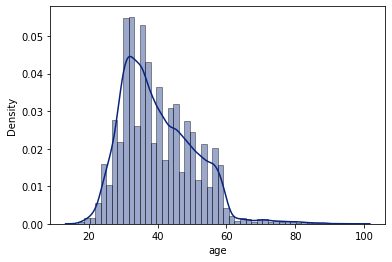

In [7]:
# Visaulizing how age is distributed in the dataset
sns.distplot(df['age'], hist = True, color = "#07247D", hist_kws = {'edgecolor':'black'})

[Text(0, 0, 'basic.4y'),
 Text(0, 0, 'high.school'),
 Text(0, 0, 'basic.6y'),
 Text(0, 0, 'basic.9y'),
 Text(0, 0, 'professional.course'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'university.degree'),
 Text(0, 0, 'illiterate')]

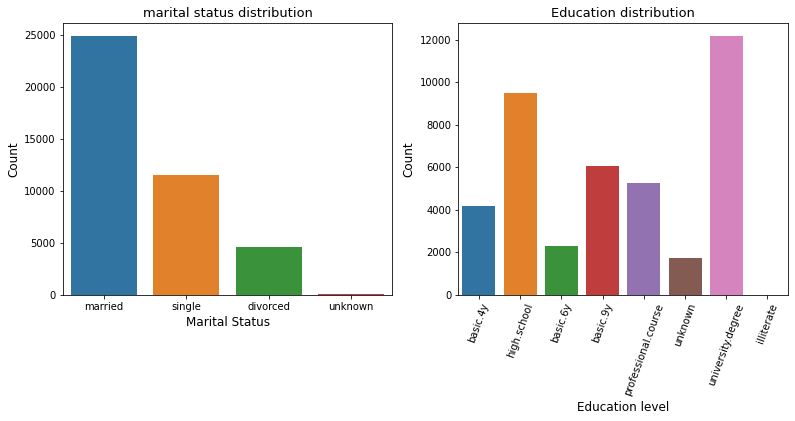

In [9]:
#Visualizing how Maritial Status and Education is distributed in the dataset.

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

# First plot for marital status
sns.countplot(x = "marital", data = df, ax = ax1)
ax1.set_title("marital status distribution", fontsize = 13)
ax1.set_xlabel("Marital Status", fontsize = 12)
ax1.set_ylabel("Count", fontsize = 12)

# Second plot for Education distribution
sns.countplot(x = "education", data = df, ax = ax2)
ax2.set_title("Education distribution", fontsize = 13)
ax2.set_xlabel("Education level", fontsize = 12)
ax2.set_ylabel("Count", fontsize = 12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 70)


Text(0.5, 1.0, 'Job Count Distribution')

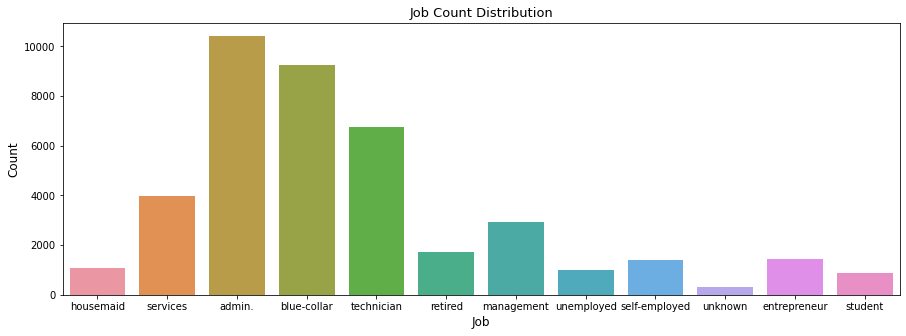

In [10]:
#Visualizing how Jobs are distribution
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x = "job", data = df)
ax.set_xlabel('Job', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_title("Job Count Distribution", fontsize = 13)

Text(0, 0.5, 'Count')

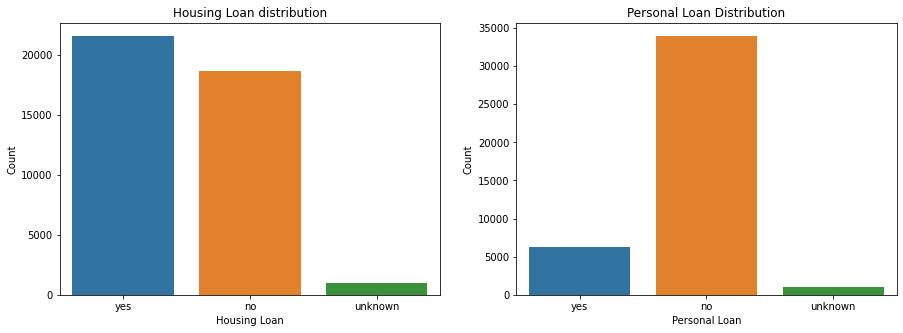

In [11]:
# Housing loan data distribution
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.countplot(x = "housing", data = df, ax = ax1, order = ['yes', 'no', 'unknown'])
ax1.set_title("Housing Loan distribution")
ax1.set_xlabel("Housing Loan")
ax1.set_ylabel("Count")

# Personal loan data distribution
sns.countplot(x = "loan", data = df, ax = ax2, order = ['yes', 'no', 'unknown'])
ax2.set_title("Personal Loan Distribution")
ax2.set_xlabel("Personal Loan")
ax2.set_ylabel("Count")

Getting total count for:

Credit Defaulters
People with Housing loan
People with Personal loan

In [12]:
print("Number of people with credit default: ", df[df['default'] == 'yes']['default'].count())
print("Number of people with no credit default: ", df[df['default'] == 'no']['default'].count())
print("Number of people who's credit default is unknown: ", df[df['default'] == 'unknown']['default'].count())

Number of people with credit default:  3
Number of people with no credit default:  32588
Number of people who's credit default is unknown:  8597


In [13]:
print("Number of people with Housing loan: ", df[df['housing'] == 'yes']['housing'].count())
print("Number of people with no Housing loan: ", df[df['housing'] == 'no']['housing'].count())
print("Number of people who's Housing loan is unknown: ", df[df['housing'] == 'unknown']['housing'].count())

Number of people with Housing loan:  21576
Number of people with no Housing loan:  18622
Number of people who's Housing loan is unknown:  990


In [14]:
print("Number of people with Personal loan: ", df[df['loan'] == 'yes']['loan'].count())
print("Number of people with no Personal loan: ", df[df['loan'] == 'no']['loan'].count())
print("Number of people who's Personal loan is unknown: ", df[df['loan'] == 'unknown']['loan'].count())

Number of people with Personal loan:  6248
Number of people with no Personal loan:  33950
Number of people who's Personal loan is unknown:  990


Visualisation related to Duration

Plotting duration using boxplot makes it difficult to obtain some important values like average of distribution and so I am plotting histogram on the side to see how its distributed and check for mean value

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Call Duration vs Count')

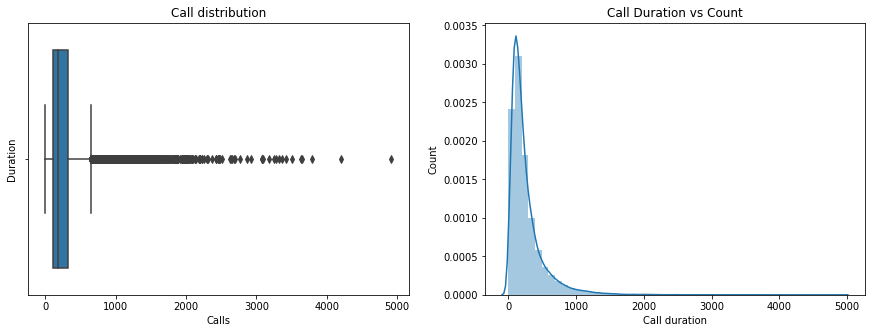

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.boxplot(x = "duration", data = df, orient = 'v', ax = ax1)
ax1.set_xlabel("Calls")
ax1.set_ylabel("Duration")
ax1.set_title("Call distribution")

sns.distplot(df['duration'], ax = ax2)
ax2.set_xlabel("Call duration")
ax2.set_ylabel("Count")
ax2.set_title("Call Duration vs Count")

In [16]:
min_duration = df['duration'].min()
max_duration = df['duration'].max()
median_duration = df['duration'].mean()
standard_dev_duration = df["duration"].std()

print("Min call duration: ", min_duration)
print("Max call duration: ", max_duration)
print("Median call duration: ", round(median_duration, 2))
print("Standard diveation in call duration: ", round(standard_dev_duration, 2))

Min call duration:  0
Max call duration:  4918
Median call duration:  258.29
Standard diveation in call duration:  259.28


We can see from the box plot that most call duration is around the mean so finding the interquartile range will help us in understanding how long the call might last

In [17]:
first_quartile = df['duration'].quantile(q = 0.25)
second_quartile = df['duration'].quantile(q = 0.50)
third_quartile = df['duration'].quantile(q = 0.75)
fourth_quartile = df['duration'].quantile(q = 1)
IRQ = third_quartile - second_quartile

print("Second Quartile: ", second_quartile)
print("Third Quartile: ", third_quartile)
print("Inter quartile range(range within which most data is present): ",IRQ)

Second Quartile:  180.0
Third Quartile:  319.0
Inter quartile range(range within which most data is present):  139.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Calls made on Days of the week')

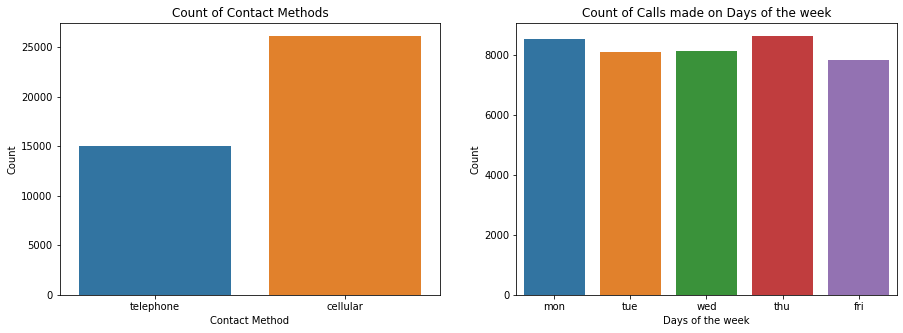

In [18]:
# For contact and Days of the week
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

sns.countplot(x = 'contact', data = df, ax = ax1)
ax1.set_xlabel("Contact Method")
ax1.set_ylabel("Count")
ax1.set_title("Count of Contact Methods")

sns.countplot(df['day_of_week'], ax = ax2)
ax2.set_xlabel("Days of the week")
ax2.set_ylabel("Count")
ax2.set_title("Count of Calls made on Days of the week")

Text(0.5, 1.0, 'Count of contacts made in each month')

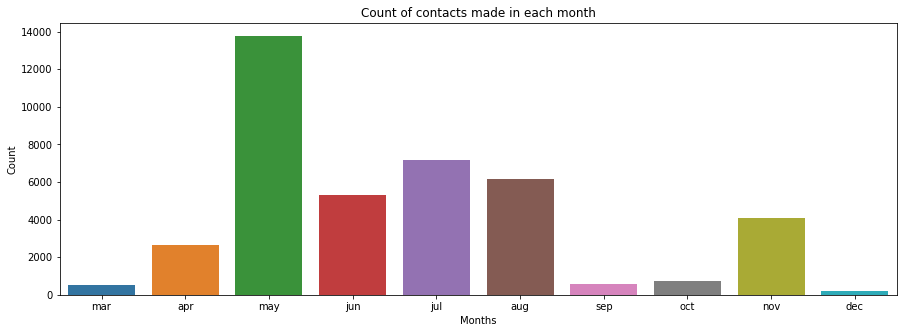

In [19]:
# For Months
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(x = 'month', data = df, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax.set_xlabel("Months")
ax.set_ylabel("Count")
ax.set_title("Count of contacts made in each month")

Text(0.5, 1.0, 'log(Duration) vs Jobs')

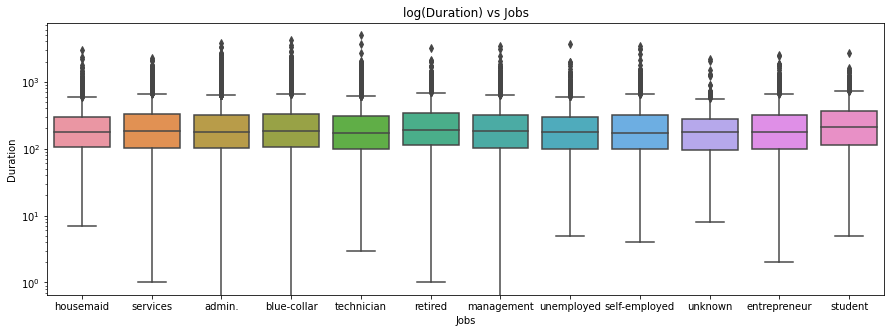

In [20]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Jobs")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Jobs")

Text(0.5, 1.0, 'log(Duration) vs Education')

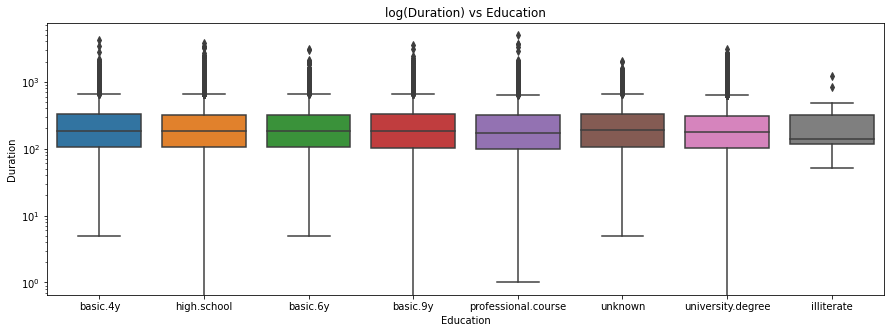

In [21]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "education", y = "duration", data = df, orient = 'v')
ax.set_xlabel("Education")
ax.set_ylabel("Duration")
ax.set_yscale("log")
ax.set_title("log(Duration) vs Education")

Categorical Treatment
Different categorial features and there values in the dataset are

In [22]:
print("Jobs: \n", df["job"].unique(),'\n')
print("Marital Status: \n", df['marital'].unique(),'\n')
print("Education: \n", df['education'].unique(),'\n')
print("Default on Credit: \n", df['default'].unique(),'\n')
print("Housing loan: \n", df['housing'].unique(),'\n')
print("Loan default: \n", df['loan'].unique(),'\n')
print("Contact type: \n", df['contact'].unique(),'\n')
print("Months: \n", df['month'].unique(),'\n')
print("day_of_week: \n", df['day_of_week'].unique(),'\n')
print("Poutcome: \n",df["poutcome"].unique(),'\n')

Jobs: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Marital Status: 
 ['married' 'single' 'divorced' 'unknown'] 

Education: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'] 

Default on Credit: 
 ['no' 'unknown' 'yes'] 

Housing loan: 
 ['no' 'yes' 'unknown'] 

Loan default: 
 ['no' 'yes' 'unknown'] 

Contact type: 
 ['telephone' 'cellular'] 

Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep'] 

day_of_week: 
 ['mon' 'tue' 'wed' 'thu' 'fri'] 

Poutcome: 
 ['nonexistent' 'failure' 'success'] 



In [23]:
labelencoder_X = LabelEncoder()

In [24]:
df["job"] = labelencoder_X.fit_transform(df["job"])
df["marital"] = labelencoder_X.fit_transform(df["marital"])
df["education"] = labelencoder_X.fit_transform(df["education"])
df["default"] = labelencoder_X.fit_transform(df["default"])
df["housing"] = labelencoder_X.fit_transform(df["housing"])
df["loan"] = labelencoder_X.fit_transform(df["loan"])
df["contact"] = labelencoder_X.fit_transform(df["contact"])
df["month"] = labelencoder_X.fit_transform(df["month"])
df["day_of_week"] = labelencoder_X.fit_transform(df["day_of_week"])
df["poutcome"] = labelencoder_X.fit_transform(df["poutcome"])

In [25]:
# For dataframes to display all the columns in the output
pd.set_option('max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [26]:
df['y'] = Y

Undersampling and Feature Engineering

In [27]:
df[df['y'] == 1].shape

(4640, 21)

Dealing with imballenced dataset
We can see that the data is imballenced so the output of the model will be biased. One way to move forward is:

Undersample the data
Oversample the data

In [28]:
# There are three types of undersample that we can use. I will be using version 3 for undersampling
undersample = NearMiss(version=3)

In [29]:
# Preparing the dataframe to be fed into undersample
df_x = df.iloc[:,:-1]
df_y = df['y']

In [34]:
# Getting out new data
X, y = undersample.fit_resample(df_x, df_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [39]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')

In [41]:
poutcomes = bank[bank.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = bank.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(bank))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(bank))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


In [42]:
dtypes = pd.DataFrame(bank.dtypes.rename('type')).reset_index().astype('str')
# Exclude duration since it is a leaky variable
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


In [43]:
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
#Bank client data Analysis and Categorical Treatment
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [45]:
# knowing the categorical variables
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [46]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


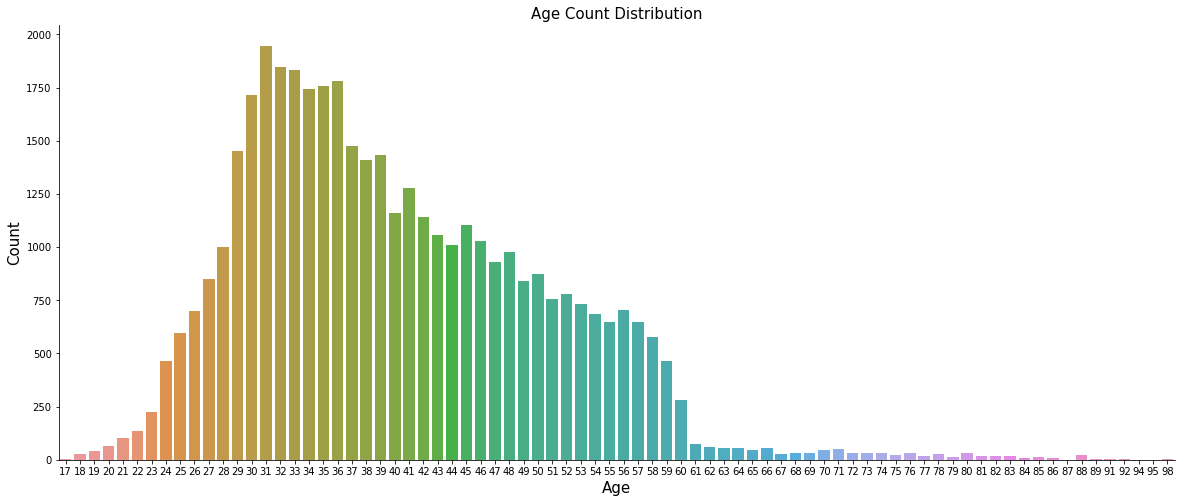

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [48]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


In [49]:
#Bank Client Categorical Treatment
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])

In [50]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [51]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [52]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


In [53]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [54]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [55]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [56]:
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,3
1,telephone,may,mon,2
2,telephone,may,mon,3
3,telephone,may,mon,2
4,telephone,may,mon,3


In [57]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [58]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [59]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [60]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [61]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(41188, 20)

In [78]:
bank_final1=bank_final.drop(['contact','month','day_of_week'], axis=1)
bank_final1.head()

,age,job,marital,education,default,housing,loan,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final1, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [80]:
X_train.head()

,age,job,marital,education,default,housing,loan,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
38912,3,5,1,6,0,2,0,5,-3.4,92.649,-30.1,0.716,5017.5,2,3,3,3
9455,2,7,1,5,1,0,0,2,1.4,94.465,-41.8,4.967,5228.1,1,999,0,1
14153,1,4,1,6,0,2,0,5,1.4,93.918,-42.7,4.962,5228.1,3,999,0,1
25021,3,6,1,6,0,2,0,1,-0.1,93.200,-42.0,4.153,5195.8,1,999,0,1
30911,2,5,0,0,0,2,2,3,-1.8,92.893,-46.2,1.344,5099.1,2,999,1,2


In [81]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6907  166]
 [ 600  327]]
90.0


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6963  110]
 [ 684  243]]
90.0


In [85]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6500  573]
 [ 610  317]]
85.0


In [86]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6613  460]
 [ 460  467]]
88.0


In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6785  288]
 [ 473  454]]
90.0
